In [1]:
#pip install num2words

In [2]:
#pip install gensim

In [3]:
#pip install wordcloud

In [4]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import re
from wordcloud import WordCloud
import warnings
warnings.filterwarnings("ignore")

In [5]:
import nltk
from nltk import word_tokenize
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/anishdulla/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/anishdulla/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [6]:
df = pd.read_csv('/Users/anishdulla/Desktop/Twitter_Data.csv')

In [7]:
df

,raw_text,category
0,when modi promised “minimum government maximum...,-1.0
1,talk all the nonsense and continue all the dra...,0.0
2,what did just say vote for modi welcome bjp t...,1.0
3,asking his supporters prefix chowkidar their n...,1.0
4,answer who among these the most powerful world...,1.0
...,...,...
162975,why these 456 crores paid neerav modi not reco...,-1.0
162976,dear rss terrorist payal gawar what about modi...,-1.0
162977,did you cover her interaction forum where she ...,0.0
162978,there big project came into india modi dream p...,0.0


In [8]:
df = df.rename({'raw_text': 'Text', 'category': 'Sentiment'}, axis=1)

In [9]:
df

,Text,Sentiment
0,when modi promised “minimum government maximum...,-1.0
1,talk all the nonsense and continue all the dra...,0.0
2,what did just say vote for modi welcome bjp t...,1.0
3,asking his supporters prefix chowkidar their n...,1.0
4,answer who among these the most powerful world...,1.0
...,...,...
162975,why these 456 crores paid neerav modi not reco...,-1.0
162976,dear rss terrorist payal gawar what about modi...,-1.0
162977,did you cover her interaction forum where she ...,0.0
162978,there big project came into india modi dream p...,0.0


In [10]:
df.loc[df['Sentiment'] == 1, 'Sentiment'] = 'Positive'
df.loc[df['Sentiment'] == 0, 'Sentiment'] = 'Neutral'
df.loc[df['Sentiment'] == -1, 'Sentiment'] = 'Negative'

In [11]:
df = df.head(20000)

In [12]:
df

,Text,Sentiment
0,when modi promised “minimum government maximum...,Negative
1,talk all the nonsense and continue all the dra...,Neutral
2,what did just say vote for modi welcome bjp t...,Positive
3,asking his supporters prefix chowkidar their n...,Positive
4,answer who among these the most powerful world...,Positive
...,...,...
19995,sushil modi the destroyer bihar bjp,Neutral
19996,new post west bengal modi and bjp are collisio...,Positive
19997,yes everyone not fool everyone cant fooled for...,Negative
19998,the eastern indian state west bengal both prim...,Negative


In [13]:
df['Text'] = df['Text'].apply(str)

In [14]:
def lower_case_convertion(text):
    lower_text = text.lower()
    return lower_text

In [15]:
df['Text'] = df['Text'].apply(lower_case_convertion)

In [16]:
def remove_emojis(text):
    emoji_pattern = re.compile("["
                               u"\U0001F600-\U0001F64F"  # emoticons
                               u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                               u"\U0001F680-\U0001F6FF"  # transport & map symbols
                               u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                               u"\U00002500-\U00002BEF"  # chinese char
                               u"\U00002702-\U000027B0"
                               u"\U00002702-\U000027B0"
                               u"\U000024C2-\U0001F251"
                               u"\U0001f926-\U0001f937"
                               u"\U00010000-\U0010ffff"
                               u"\u2640-\u2642"
                               u"\u2600-\u2B55"
                               u"\u200d"
                               u"\u23cf"
                               u"\u23e9"
                               u"\u231a"
                               u"\ufe0f"  # dingbats
                               u"\u3030"
                               "]+", flags=re.UNICODE)
    without_emoji = emoji_pattern.sub(r'', text)
    return without_emoji

In [17]:
df['Text'] = df['Text'].apply(remove_emojis)

In [18]:
#Removes Special Characters and Replaces Them With a Whitespace

df['Text'] = df['Text'].apply(lambda row: re.sub('[^A-Za-z0-9]+', ' ', row))

In [19]:
#Seperates Numbers From Text

df['Text'] = df['Text'].apply(lambda row: re.sub(r"([0-9]+(\.[0-9]+)?)", r" \1 ", row).strip())

In [20]:
from num2words import num2words

In [21]:
def num_to_words(text):
    after_spliting = text.split()
    for index in range(len(after_spliting)):
        if after_spliting[index].isdigit():
            after_spliting[index] = num2words(after_spliting[index])
            
    numbers_to_words = ' '.join(after_spliting)
    return numbers_to_words


In [22]:
df['Text'] = df['Text'].apply(num_to_words)

In [23]:
def remove_single_char(text):
    single_char_pattern = r'\s+[a-zA-Z]\s+'
    without_sc = re.sub(pattern=single_char_pattern, repl=" ", string=text)
    return without_sc

In [24]:
df['Text'] = df['Text'].apply(remove_single_char)

In [25]:
def remove_extra_spaces(text):
    space_pattern = r'\s+'
    without_space = re.sub(pattern=space_pattern, repl=" ", string=text)
    return without_space

In [26]:
df['Text'] = df['Text'].apply(remove_extra_spaces)

In [27]:
from nltk.corpus import stopwords

In [28]:
stopwords_nltk = list(stopwords.words('english'))
all_stopwords = []
all_stopwords.extend(stopwords_nltk)

def remove_stopwords(text):
    text_without_sw = []
    text_tokens = word_tokenize(text)
    for word in text_tokens:
        if word not in all_stopwords:
            text_without_sw.append(word)

    without_sw = ' '.join(text_without_sw)
    return without_sw

In [29]:
df['Text'] = df['Text'].apply(remove_stopwords)

In [30]:
from nltk.stem import WordNetLemmatizer

In [31]:
lemma = WordNetLemmatizer()

def lemmatization(text):
    tokens = word_tokenize(text)
    for index in range(len(tokens)):
        lemma_word = lemma.lemmatize(tokens[index])
        tokens[index] = lemma_word

    return ' '.join(tokens)

In [32]:
df['Text'] = df['Text'].apply(lemmatization)

In [33]:
df

,Text,Sentiment
0,modi promised minimum government maximum gover...,Negative
1,talk nonsense continue drama vote modi,Neutral
2,say vote modi welcome bjp told rahul main camp...,Positive
3,asking supporter prefix chowkidar name modi gr...,Positive
4,answer among powerful world leader today trump...,Positive
...,...,...
19995,sushil modi destroyer bihar bjp,Neutral
19996,new post west bengal modi bjp collision course...,Positive
19997,yes everyone fool everyone cant fooled long ex...,Negative
19998,eastern indian state west bengal prime ministe...,Negative


In [34]:
from gensim.models.doc2vec import Doc2Vec, TaggedDocument

In [63]:
card_docs = [TaggedDocument(doc.split(' '), [i]) for i, doc in enumerate(df.Text)]

In [36]:
model = Doc2Vec(vector_size=64, window=2, min_count=1, workers=8, epochs=40)

In [37]:
model.build_vocab(card_docs)
model.train(card_docs, total_examples=model.corpus_count, epochs=model.epochs)

In [38]:
card2vec = [model.infer_vector((df['Text'][i].split(' '))) for i in range(0, len(df['Text']))]

In [39]:
dtv = np.array(card2vec).tolist()
df['vec'] = dtv

In [40]:
df

,Text,Sentiment,vec
0,modi promised minimum government maximum gover...,Negative,"[-0.28905659914016724, -1.4539247751235962, 0...."
1,talk nonsense continue drama vote modi,Neutral,"[0.022038958966732025, -0.14780326187610626, -..."
2,say vote modi welcome bjp told rahul main camp...,Positive,"[-0.03459923714399338, 0.20181860029697418, -0..."
3,asking supporter prefix chowkidar name modi gr...,Positive,"[0.15272356569766998, 0.43195995688438416, -0...."
4,answer among powerful world leader today trump...,Positive,"[0.12727725505828857, -0.6062704920768738, 0.4..."
...,...,...,...
19995,sushil modi destroyer bihar bjp,Neutral,"[0.2520749568939209, -0.09258206188678741, 0.0..."
19996,new post west bengal modi bjp collision course...,Positive,"[0.052376944571733475, -0.005651269108057022, ..."
19997,yes everyone fool everyone cant fooled long ex...,Negative,"[-0.6579780578613281, -0.857057511806488, 0.72..."
19998,eastern indian state west bengal prime ministe...,Negative,"[0.248681902885437, -0.26754331588745117, 0.20..."


In [41]:
from sklearn.cluster import KMeans

In [42]:
kmeans = KMeans(n_clusters=5)
df['cluster'] = kmeans.fit_predict(df['vec'].values.tolist())

In [43]:
from sklearn.decomposition import PCA

In [44]:
pca = PCA(n_components=3)
df['x'] = pca.fit_transform(df['vec'].values.tolist())[:,0]
df['y'] = pca.fit_transform(df['vec'].values.tolist())[:,1]
df['z'] = pca.fit_transform(df['vec'].values.tolist())[:,2]

Text(0.5, 1.0, '2D Tweet Clustering Using K Means')

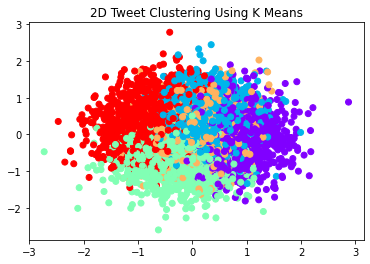

In [45]:
plt.scatter(df['x'], df['y'], c=df['cluster'], cmap='rainbow')
plt.title('2D Tweet Clustering Using K Means')

Text(0.5, 0.92, '3D Tweet Clustering using K Means')

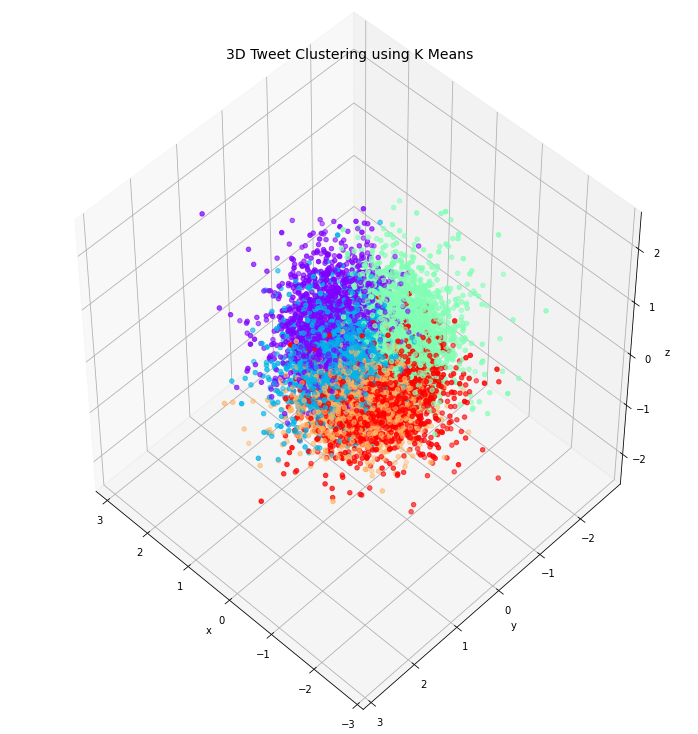

In [46]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(1, figsize=(10,10))
ax = Axes3D(fig, rect=[0, 0, 0.95, 1], elev=48, azim=134)
ax.scatter(df['x'], df['y'], df['z'], c=df['cluster'], cmap='rainbow')
ax.set_xlabel("x")
ax.set_ylabel("y")
ax.set_zlabel("z")
ax.set_facecolor('white')
plt.title("3D Tweet Clustering using K Means", fontsize=14)

In [47]:
df.groupby(['cluster'])['Sentiment'].value_counts()

cluster  Sentiment
0        Positive     1195
         Negative      900
         Neutral       574
1        Neutral      3110
         Positive     2358
         Negative     1237
2        Positive     1698
         Negative      847
         Neutral       823
3        Positive     1793
         Neutral      1418
         Negative     1031
4        Positive     1330
         Neutral       882
         Negative      804
Name: Sentiment, dtype: int64

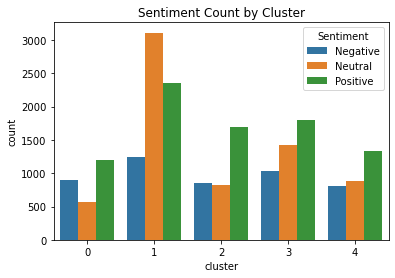

In [48]:
sns.countplot(data=df, x='cluster', hue='Sentiment')
plt.title('Sentiment Count by Cluster')
plt.show()

In [49]:
df_ca = df.groupby(['cluster'])['Sentiment'].value_counts().unstack()
df_ca = df_ca.reset_index()
df_ca['Positive %'] = df_ca['Positive'] / (df_ca['Positive'] + df_ca['Negative'] + df_ca['Neutral'])
df_ca['Negative %'] = df_ca['Negative'] / (df_ca['Positive'] + df_ca['Negative'] + df_ca['Neutral'])
df_ca['Neutral %'] = df_ca['Neutral'] / (df_ca['Positive'] + df_ca['Negative'] + df_ca['Neutral'])
df_ca

Sentiment,cluster,Negative,Neutral,Positive,Positive %,Negative %,Neutral %
0,0,900,574,1195,0.447733,0.337205,0.215062
1,1,1237,3110,2358,0.351678,0.184489,0.463833
2,2,847,823,1698,0.504157,0.251485,0.244359
3,3,1031,1418,1793,0.422678,0.243046,0.334276
4,4,804,882,1330,0.440981,0.266578,0.292440


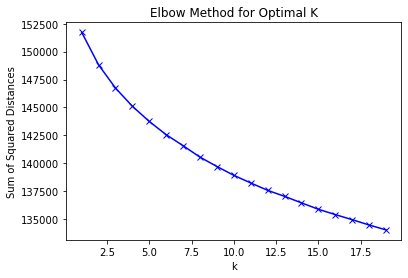

In [50]:
#Elbow Method to define number of k for the clustering
sum_of_squared_distances = []
K = range(1, 20)
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(pd.DataFrame(df['vec'].values.tolist()))
    sum_of_squared_distances.append(km.inertia_)

plt.plot(K, sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum of Squared Distances')
plt.title('Elbow Method for Optimal K')
plt.show()

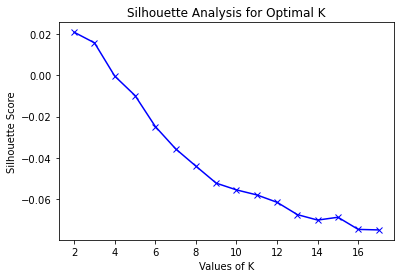

In [51]:
from sklearn.metrics import silhouette_score

range_n_clusters = [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17]
silhouette_avg = []

for num_clusters in range_n_clusters:
    kmeans = KMeans(n_clusters=num_clusters)
    kmeans.fit(pd.DataFrame(df['vec'].values.tolist()))
    cluster_labels = kmeans.labels_
    silhouette_avg.append(silhouette_score(df['vec'].values.tolist(), cluster_labels))

plt.plot(range_n_clusters, silhouette_avg, 'bx-')
plt.xlabel('Values of K')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Analysis for Optimal K')
plt.show()

In [52]:
df

,Text,Sentiment,vec,cluster,x,y,z
0,modi promised minimum government maximum gover...,Negative,"[-0.28905659914016724, -1.4539247751235962, 0....",4,-0.454243,0.340274,-0.267642
1,talk nonsense continue drama vote modi,Neutral,"[0.022038958966732025, -0.14780326187610626, -...",1,-0.336710,0.277065,0.601426
2,say vote modi welcome bjp told rahul main camp...,Positive,"[-0.03459923714399338, 0.20181860029697418, -0...",2,-0.882147,0.021548,1.007833
3,asking supporter prefix chowkidar name modi gr...,Positive,"[0.15272356569766998, 0.43195995688438416, -0....",4,-0.857069,-0.121248,-0.136324
4,answer among powerful world leader today trump...,Positive,"[0.12727725505828857, -0.6062704920768738, 0.4...",1,-0.108452,0.047369,0.067646
...,...,...,...,...,...,...,...
19995,sushil modi destroyer bihar bjp,Neutral,"[0.2520749568939209, -0.09258206188678741, 0.0...",1,0.194636,0.121684,0.147188
19996,new post west bengal modi bjp collision course...,Positive,"[0.052376944571733475, -0.005651269108057022, ...",1,0.056272,0.024032,-0.191335
19997,yes everyone fool everyone cant fooled long ex...,Negative,"[-0.6579780578613281, -0.857057511806488, 0.72...",4,-0.453007,-0.463438,-0.012389
19998,eastern indian state west bengal prime ministe...,Negative,"[0.248681902885437, -0.26754331588745117, 0.20...",3,0.259930,-0.075823,-1.159522


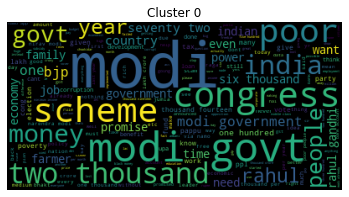

In [58]:
c0 = df.loc[df['cluster'] == 0]
text = ' '.join(c0['Text'])
wordcloud = WordCloud().generate(text)
plt.imshow(wordcloud)
plt.axis('off')
plt.title('Cluster 0')
plt.show()

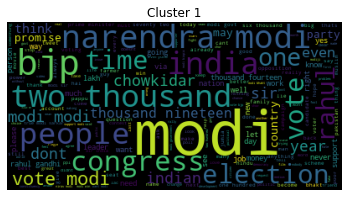

In [59]:
c1 = df.loc[df['cluster'] == 1]
text = ' '.join(c1['Text'])
wordcloud = WordCloud().generate(text)
plt.imshow(wordcloud)
plt.axis('off')
plt.title('Cluster 1')
plt.show()

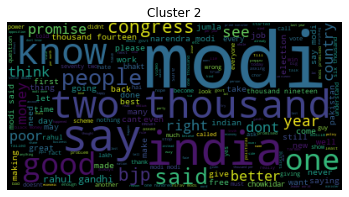

In [60]:
c2 = df.loc[df['cluster'] == 2]
text = ' '.join(c2['Text'])
wordcloud = WordCloud().generate(text)
plt.imshow(wordcloud)
plt.axis('off')
plt.title('Cluster 2')
plt.show()

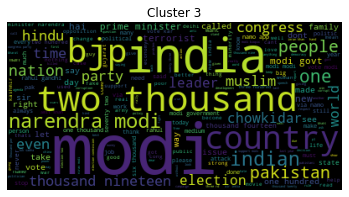

In [61]:
c3 = df.loc[df['cluster'] == 3]
text = ' '.join(c3['Text'])
wordcloud = WordCloud().generate(text)
plt.imshow(wordcloud)
plt.axis('off')
plt.title('Cluster 3')
plt.show()

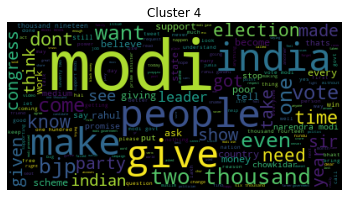

In [62]:
c4 = df.loc[df['cluster'] == 4]
text = ' '.join(c4['Text'])
wordcloud = WordCloud().generate(text)
plt.imshow(wordcloud)
plt.axis('off')
plt.title('Cluster 4')
plt.show()